Integrantes  
Bryann Alfaro  
Raul Jimenez  
Donaldo Garcia

## Paso 1 - Exploracion de datos

In [1]:
#Load dataframe
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

df = pd.read_csv('dataset_pishing.csv')

#Mostrar 5 observaciones
df.head()

,url,ip,nb_www,nb_com,nb_dslash,http_in_path,punycode,port,tld_in_path,tld_in_subdomain,...,domain_in_title,domain_with_copyright,whois_registered_domain,domain_registration_length,domain_age,web_traffic,dns_record,google_index,page_rank,status
0,http://www.crestonwood.com/router.php,0,1,0,0,0,0,0,0,0,...,0,1,0,45,-1,0,1,1,4,legitimate
1,http://shadetreetechnology.com/V4/validation/a...,1,0,0,0,0,0,0,0,0,...,1,0,0,77,5767,0,0,1,2,phishing
2,https://support-appleld.com.secureupdate.duila...,1,0,1,0,0,0,0,0,1,...,1,0,0,14,4004,5828815,0,1,0,phishing
3,http://rgipt.ac.in,0,0,0,0,0,0,0,0,0,...,1,0,0,62,-1,107721,0,0,3,legitimate
4,http://www.iracing.com/tracks/gateway-motorspo...,0,1,0,0,0,0,0,0,0,...,0,1,0,224,8175,8725,0,0,6,legitimate


In [2]:
#Mostrar cantidad de observaciones de columna status
df['status'].value_counts()

legitimate    5715
phishing      5715
Name: status, dtype: int64

Se puede observar que el dataset esta balanceado por medio de la columna status

## Derivacion de caracteristicas

f1 

In [3]:
#Obtener len de las url
df['len_url'] = df['url'].apply(len)
#show url and len url 
df[['url','len_url']].head()


,url,len_url
0,http://www.crestonwood.com/router.php,37
1,http://shadetreetechnology.com/V4/validation/a...,77
2,https://support-appleld.com.secureupdate.duila...,126
3,http://rgipt.ac.in,18
4,http://www.iracing.com/tracks/gateway-motorspo...,55


f2

In [4]:
from urllib.parse import urlparse
def get_hostname(url):
    return urlparse(url).hostname

df['hostname_len'] = df['url'].apply(get_hostname).apply(len)
df[['url','hostname_len']].head()

,url,hostname_len
0,http://www.crestonwood.com/router.php,19
1,http://shadetreetechnology.com/V4/validation/a...,23
2,https://support-appleld.com.secureupdate.duila...,50
3,http://rgipt.ac.in,11
4,http://www.iracing.com/tracks/gateway-motorspo...,15


f3

In [5]:
#Show ip column
df[['url','ip']].head()

,url,ip
0,http://www.crestonwood.com/router.php,0
1,http://shadetreetechnology.com/V4/validation/a...,1
2,https://support-appleld.com.secureupdate.duila...,1
3,http://rgipt.ac.in,0
4,http://www.iracing.com/tracks/gateway-motorspo...,0


f4 - f20

In [6]:
# list of special characters to count in url
special_characters = ['.','-','@','|','_','~','%','/','?','&','=','*',':',',',';','$','%20']
# count every special character in url column of df and create a new column for each special character with the count
for special_character in special_characters:
    df[f'{special_character}_url_count'] = df['url'].apply(lambda x: x.count(special_character))
# show the new columns with the string "_count" and the url column
df[[f'{special_character}_url_count' for special_character in special_characters] + ['url']].head()

,._url_count,-_url_count,@_url_count,|_url_count,__url_count,~_url_count,%_url_count,/_url_count,?_url_count,&_url_count,=_url_count,*_url_count,:_url_count,",_url_count",;_url_count,$_url_count,%20_url_count,url
0,3,0,0,0,0,0,0,3,0,0,0,0,1,0,0,0,0,http://www.crestonwood.com/router.php
1,1,0,0,0,0,0,0,5,0,0,0,0,1,0,0,0,0,http://shadetreetechnology.com/V4/validation/a...
2,4,1,0,0,2,0,0,5,1,2,3,0,1,0,0,0,0,https://support-appleld.com.secureupdate.duila...
3,2,0,0,0,0,0,0,2,0,0,0,0,1,0,0,0,0,http://rgipt.ac.in
4,2,2,0,0,0,0,0,5,0,0,0,0,1,0,0,0,0,http://www.iracing.com/tracks/gateway-motorspo...


f25

In [7]:
df.columns.sort_values()
df[['http_in_path','status','url']].head()

,http_in_path,status,url
0,0,legitimate,http://www.crestonwood.com/router.php
1,0,phishing,http://shadetreetechnology.com/V4/validation/a...
2,0,phishing,https://support-appleld.com.secureupdate.duila...
3,0,legitimate,http://rgipt.ac.in
4,0,legitimate,http://www.iracing.com/tracks/gateway-motorspo...


In [8]:
#count https
def count_https(url):
    return 1 if urlparse(url).scheme == 'https' else 0



df['https'] = df['url'].apply(count_https)
df[['url','https']].head()

,url,https
0,http://www.crestonwood.com/router.php,0
1,http://shadetreetechnology.com/V4/validation/a...,0
2,https://support-appleld.com.secureupdate.duila...,1
3,http://rgipt.ac.in,0
4,http://www.iracing.com/tracks/gateway-motorspo...,0


f26

In [9]:
#count digits in url and calculate the ratio
def count_digits(url):
    #COUNT DIGITS AND DIVIDE BY THE LENGTH OF THE URL
    return sum(c.isdigit() for c in url)/len(url)

df['url_digits_ratio'] = df['url'].apply(count_digits)
df[['url','url_digits_ratio']].head()

,url,url_digits_ratio
0,http://www.crestonwood.com/router.php,0.000000
1,http://shadetreetechnology.com/V4/validation/a...,0.220779
2,https://support-appleld.com.secureupdate.duila...,0.150794
3,http://rgipt.ac.in,0.000000
4,http://www.iracing.com/tracks/gateway-motorspo...,0.000000


f27

In [10]:
#Count digits in hostname and calculate the ratio
def count_digits_hostname(url):
    #COUNT DIGITS AND DIVIDE BY THE LENGTH OF THE HOSTNAME

    return sum(c.isdigit() for c in get_hostname(url))/len(get_hostname(url))
df['digits_hostname_ratio'] = df['url'].apply(count_digits_hostname)
df[['url','digits_hostname_ratio']].head()

,url,digits_hostname_ratio
0,http://www.crestonwood.com/router.php,0.0
1,http://shadetreetechnology.com/V4/validation/a...,0.0
2,https://support-appleld.com.secureupdate.duila...,0.0
3,http://rgipt.ac.in,0.0
4,http://www.iracing.com/tracks/gateway-motorspo...,0.0


visualizacion de columnas nuevas

In [11]:
df.head()

,url,ip,nb_www,nb_com,nb_dslash,http_in_path,punycode,port,tld_in_path,tld_in_subdomain,...,=_url_count,*_url_count,:_url_count,",_url_count",;_url_count,$_url_count,%20_url_count,https,url_digits_ratio,digits_hostname_ratio
0,http://www.crestonwood.com/router.php,0,1,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0.000000,0.0
1,http://shadetreetechnology.com/V4/validation/a...,1,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0.220779,0.0
2,https://support-appleld.com.secureupdate.duila...,1,0,1,0,0,0,0,0,1,...,3,0,1,0,0,0,0,1,0.150794,0.0
3,http://rgipt.ac.in,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0.000000,0.0
4,http://www.iracing.com/tracks/gateway-motorspo...,0,1,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0.000000,0.0


## Preprocesamiento

In [12]:
#Convert status to 0 and 1
#https://www.geeksforgeeks.org/how-to-replace-values-in-column-based-on-condition-in-pandas/
df["status"] = np.where(df["status"] == "phishing", 1, 0)
#show status
df['status'].value_counts()


0    5715
1    5715
Name: status, dtype: int64

In [13]:
#Delete URL column
df = df.drop(['url'], axis=1)
df.head()

,ip,nb_www,nb_com,nb_dslash,http_in_path,punycode,port,tld_in_path,tld_in_subdomain,abnormal_subdomain,...,=_url_count,*_url_count,:_url_count,",_url_count",;_url_count,$_url_count,%20_url_count,https,url_digits_ratio,digits_hostname_ratio
0,0,1,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0.000000,0.0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0.220779,0.0
2,1,0,1,0,0,0,0,0,1,0,...,3,0,1,0,0,0,0,1,0.150794,0.0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0.000000,0.0
4,0,1,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0.000000,0.0


Reporte pandas

In [ ]:
#Make a pandas profile
import pandas_profiling
report = pandas_profiling.ProfileReport(df)
report.to_file("Reporte Phishing.html")



In [14]:
df['status'].value_counts()

0    5715
1    5715
Name: status, dtype: int64

In [19]:
#Get the correlation matrix
corr = df.corr()
corr
#show status correlation with the rest of the columns
corr['status'].sort_values(ascending=False).head(15)


status                   1.000000
google_index             0.731171
url_digits_ratio         0.356421
domain_in_title          0.342807
phish_hints              0.335393
ip                       0.321698
?_url_count              0.294319
len_url                  0.248482
/_url_count              0.242270
hostname_len             0.238322
=_url_count              0.233386
digits_hostname_ratio    0.224335
shortest_word_host       0.223084
prefix_suffix            0.214681
longest_word_path        0.212709
Name: status, dtype: float64

In [31]:
new_df = df[['google_index','url_digits_ratio','domain_in_title','phish_hints','ip','?_url_count','len_url','/_url_count','hostname_len']]



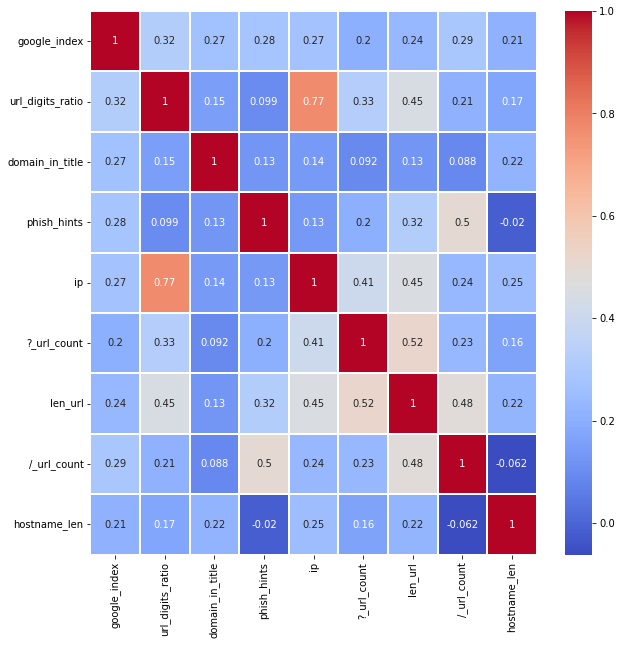

In [32]:
#Show correlation matrix of new_df
corr = new_df.corr()
#Visualize
plt.figure(figsize=(10,10))
sns.heatmap(corr, annot=True, cmap='coolwarm', linewidths=0.2)
fig=plt.gcf()

In [33]:
#Delete duplicates in new_df
new_df = new_df.drop_duplicates()

In [34]:
new_df.shape

(7751, 9)